# **Data Analysis with Clustering**
- **Coding Dojo**
- **Course 3 - Advanced Machine Learning**
- **Week 1 - Lecture 1**

# **Code Along Exercise**


### **Data**

#### **Mall Customer Segmentation Data**




This is **a dataset for mall customers** and its originally from **[Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)**.

This dataset is about customers and spending habits.  

- The problem we are solving is how to group similar customers together and understand the different groups.  This is a common clustering problem called Customer Segmentation.

- Our challenge is to provide a meaningful analysis of customer groups based on the data. This is a business analyst task that can be improved with unsupervised learning.



### **Import Libraries**

In [1]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns

## Warnings
import warnings

## Import Preprocessing Standard Scaler Transformer
from sklearn.preprocessing import StandardScaler

# new libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **Notebook Defaults and Runtime Configurations**

##### **Warnings**

In [2]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

##### **Pandas Display Configurations**

In [3]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

##### **MatPlotLib rcParams**

- **Customizing Matplotlib with style sheets and rcParams**

 - https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [4]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 14,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

## **Load and inspect the data**

### **Load the Data**

In [5]:
## Define the file address as a string
file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQGG95zRf7Hmos7Gx7VqpJmksOos3bgxr73KYfmc8soEnvk_L4rVcNPcUHDpmNMDnRyof6UPlm-DTEp/pub?gid=1011669702&single=true&output=csv'

In [6]:
## Define a dataframe df
## from the file stored at the location file_url
df = pd.read_csv(file_url)

### **Inspect the Data**

#### **.head()**

In [7]:
## Display the first (5) rows of the dataframe
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


- The data appears to have loaded correctly.

#### **.shape**

In [8]:
## Display the number of rows and columns for the dataframe
df.shape

(200, 4)

In [9]:
## Display the number of rows and columns for the dataframe
## using a print() statement and an F-string
## 'There are x rows and x columns in the dataframe'
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe.')

There are 200 rows and 4 columns in the dataframe.


#### **.dtypes**

In [10]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### **.info()**

In [11]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## **Clean the Data**

- This step has been omitted for Lecture Purposes only.

## **EDA**

- This step has been omitted for Lecture Purposes only.

## **Model Validation Split**

- **This is not required for Unsupervised Learning.**
  - There is no predicted target, and model validation is not required.

- **What Questions do you have?**

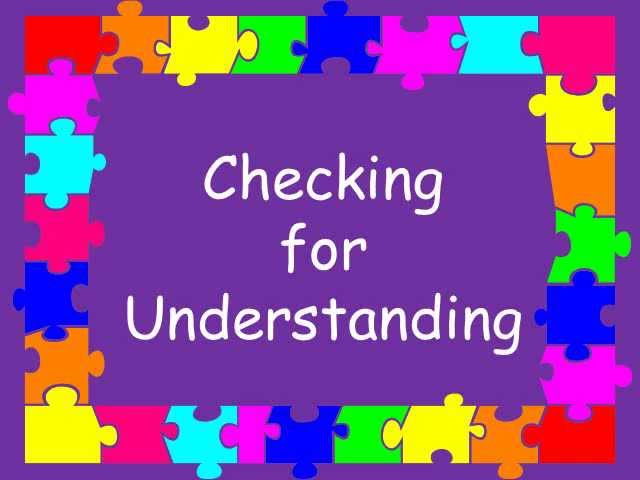

## **Preprocess the Data**

### **Select Features to Analyze**

- Initially, we will only utilize **'Annual Income (k$)'** and **'Spending Score (1-100)'** columns to analyse the clusters.


In [12]:
# define the columns you want to use (X is fine, but remember there isn't an X and y)
ml_df = df[['Annual Income (k$)','Spending Score (1-100)', 'Age']]

In [13]:
# check head of new data
ml_df.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [14]:
## Display the column names, count of non-null values, and their datatypes
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
 2   Age                     200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


### **Transform the Data**

In [15]:
# scale the data using standard scaler
scaler = StandardScaler()
processed_ml_df = scaler.fit_transform(ml_df)

**Why do we scale data**?

- Clustering algorithms are looking for points that are 'close' together.  However, if the features are on different scales, for instance if one is on the order of 10s and another is on the order of 100000s, then the feature with the larger variance, the one on the scale of 100000s, will have an outsized effect on how the algorithm determines 'closeness'.

- By scaling the features, each feature will be considered equally in determining how close or far apart data points are.

- **What Questions do you have?**

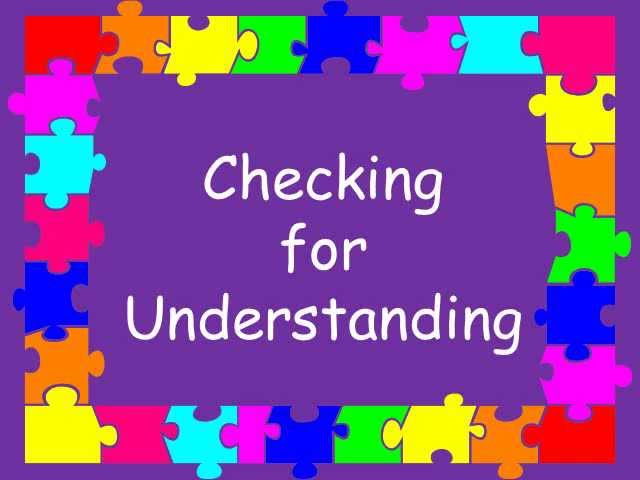

## **Model the Data**

### **Choosing Number of Clusters**



Kmeans does not choose the number of clusters to group the data into, that's our job!

There are many ways to do this:
1. Subject Matter Expertise
2. Try several different numbers and explore the clusters for each to see if they make sense.
3. Inertia method
4. Silhouette Score method


#### **Inertia**

- Inertia is measured from each sample to the centroid of its cluster (the centroid is just the center)

- The closer each point is to the center of its cluster, the tighter the cluster

- A lower inertia indicates better clustering

- The more clusters you have, the lower the inertia will be

- But too many clusters is not useful (imagine the extreme case where every data point was its own cluster---inertia would be minimized, but there are no useful groups)

- **The elbow method enables you to visualize the *tradeoff* between inertia and the number of clusters.**
 - The Point where the graph starts to level off indicates a good tradeoff between the inertia and the number of clusters.

##### **Inertia Elbow Plot**

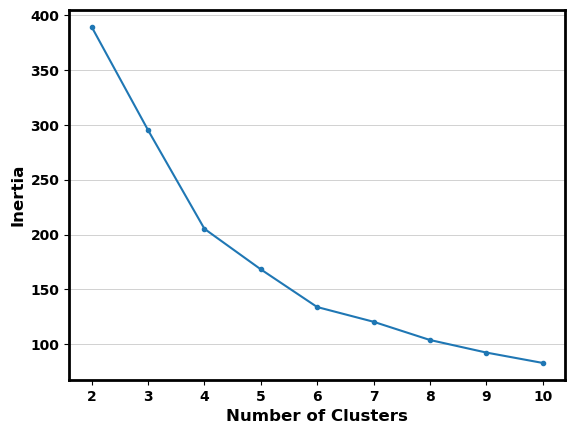

In [16]:
## Create an empty list of inertias
inertias = []

## Loop through k values between 2 and 10
## and store the scores in the list
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_ml_df)
    inertias.append(kmeans.inertia_)

## Visualize the scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

- **What Questions do you have?**

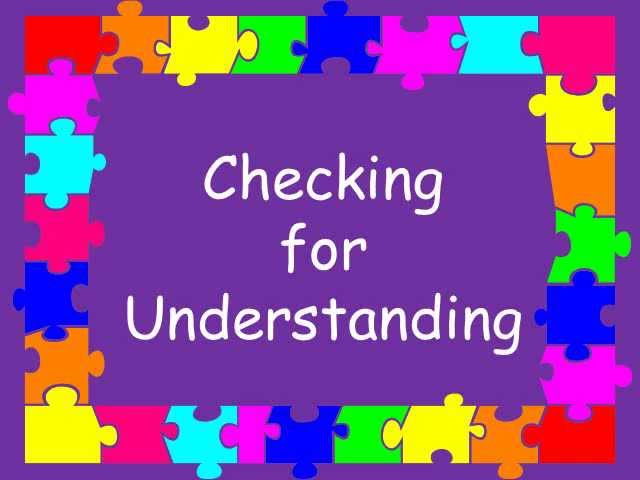

#### **Silhouette**

- Silhouette score is a measure of how dense each cluster is and how well separated they are from each other.

- The metric is similar to inertia in its overall goal, but it is calculated and interpreted differently.

- Rather than basing the calculations on the centroid, the calculation is based on the distance between points in the same cluster vs distance between points in different clusters

- The silhouette score is computed on every datapoint in every cluster

- The range of Silhouette Scores is -1 to 1 with a **higher score being better**

- **If a graph shows silhouette scores on the y-axis, you would select the highest value.**
  - The elbow method **does not apply** to silhouette scores.



##### **Silhouette Score Plot**

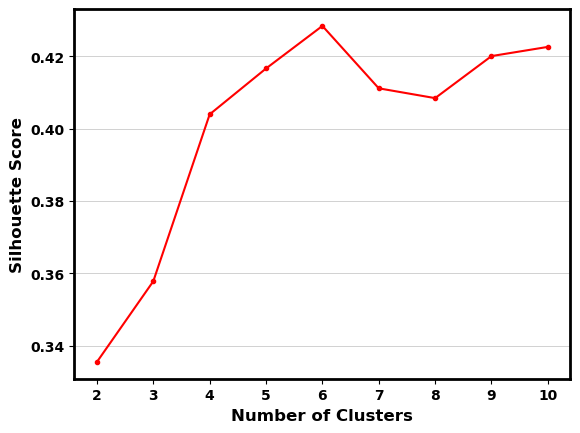

In [17]:
## Create an empty list for silhouette scores
silhouette_scores = []

## Loop through k values between 2 and 10
## and store the scores in the list
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(processed_ml_df)
  silhouette_scores.append(silhouette_score(processed_ml_df, kmeans.labels_))

## Visualize the scores
plt.plot(range(2, 11), silhouette_scores, marker = '.', color ='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

- **What Questions do you have?**

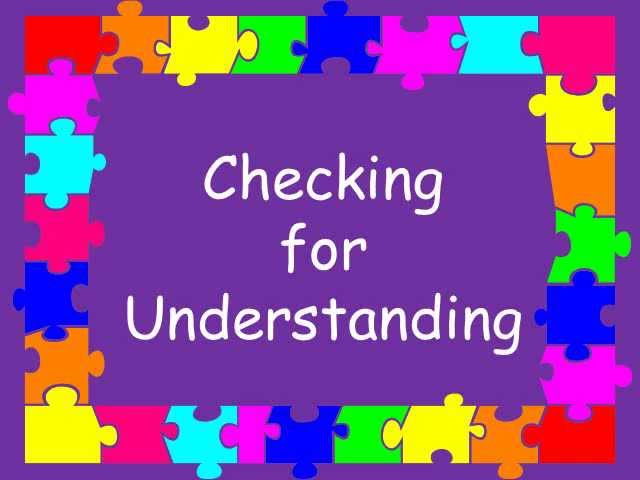

#### **Inertia Elbow and Silhouette Score Plots Combined**

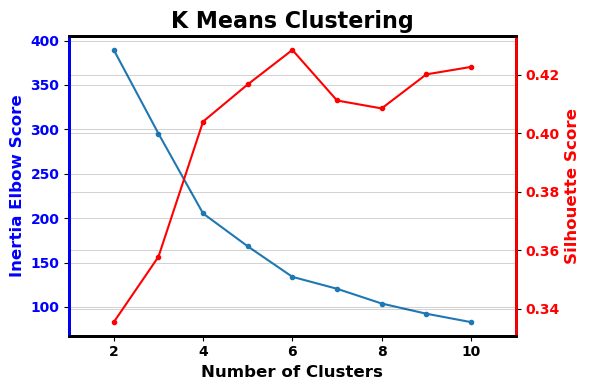

In [18]:
## Create empty lists for scores
inertias = []
silhouette_scores = []

## Loop through k values between 2 and 10
## and store the scores in the list
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_ml_df)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(processed_ml_df, kmeans.labels_))

## Visualize the scores
fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('K Means Clustering', fontsize = 16, weight='bold')

ax1.plot(range(2, 11), inertias, marker = '.')
ax1.set_ylabel('Inertia Elbow Score', color='blue', fontsize = 12, weight='bold')
plt.xlabel('Number of Clusters', fontsize = 12, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_ticks(np.arange(0, 12, 2))

plt.xlim([1, 11])

ax2 = ax1.twinx()
ax2.plot(range(2, 11), silhouette_scores, color='r', marker = '.')
ax2.set_ylabel('Silhouette Score', color='r', fontsize = 12, weight='bold', )
plt.yticks(fontsize = 10, weight='bold');
ax2.tick_params(axis='y', labelcolor='r')
ax2.spines['right'].set_color('r')

ax2.spines['left'].set_color('blue');
ax2.spines['right'].set_color('r');

plt.tight_layout()
plt.show;

**K = 6** would be the value I would choose to optimize both the Inertia Score and the Silhouette Score.
- **Inertia Score** - The best clustering is a balance between the lowest number of clusters and the lowest inertia.
- **Silhouette Score** -  The best score is 1 (signaling well-defined & well-separated clusters) and the worst is -1.

**Note**: Sometimes the Inertia Elbow Method and the Silhouette Score disagree!  There is no exact science for choosing clusters.

### **Instantiate and Fit the Model**

In [19]:
# instantiate a KMeans model with the value for k based on elbow plot method
# and silhouette score
km = KMeans(n_clusters=6, random_state=42)
km.fit(processed_ml_df)

KMeans(n_clusters=6, random_state=42)

- **What Questions do you have?**

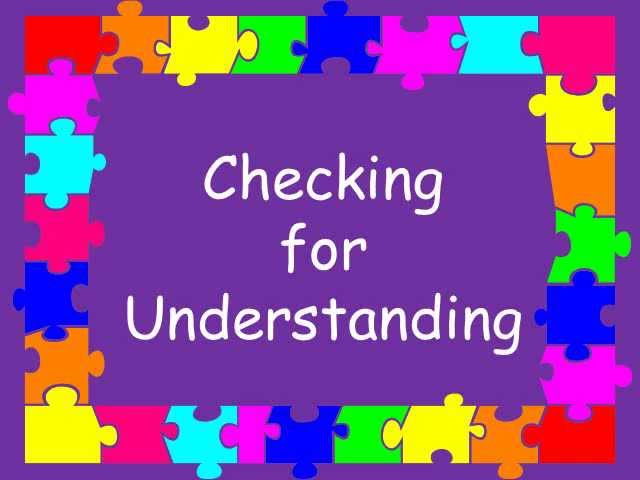

## **Analyze the Clusters**

In [20]:
# add a column to the dataframe to add the cluster label as you fit and predict x
df['cluster'] = km.labels_

#### **Cluster Statistics**

In [32]:
## Define a variable for a dataframe
## grouped by cluster
cluster_groups = df.groupby('cluster')

In [33]:
## Display the descriptive statistics for the column
cluster_groups['Age'].describe().T

cluster,0,1,2,3,4,5
count,23.000000,45.000000,33.000000,39.000000,39.000000,21.000000
mean,25.000000,56.333333,41.939394,26.794872,32.692308,45.523810
std,5.300086,8.453079,10.179450,7.056835,3.728650,11.766984
min,18.000000,43.000000,19.000000,18.000000,27.000000,20.000000
25%,21.000000,49.000000,36.000000,20.500000,30.000000,36.000000
50%,23.000000,54.000000,43.000000,26.000000,32.000000,46.000000
75%,29.500000,65.000000,47.000000,31.500000,35.500000,53.000000
max,35.000000,70.000000,59.000000,40.000000,40.000000,67.000000


In [34]:
## Display the descriptive statistics for the column
cluster_groups['Annual Income (k$)'].describe().T

cluster,0,1,2,3,4,5
count,23.000000,45.000000,33.000000,39.000000,39.000000,21.000000
mean,25.260870,54.266667,88.939394,57.102564,86.538462,26.285714
std,7.723738,8.975725,16.586778,10.161317,16.312485,7.437357
min,15.000000,38.000000,71.000000,39.000000,69.000000,16.000000
25%,19.000000,47.000000,78.000000,48.000000,75.500000,20.000000
50%,24.000000,54.000000,86.000000,60.000000,79.000000,25.000000
75%,31.500000,62.000000,98.000000,64.000000,95.000000,33.000000
max,39.000000,79.000000,137.000000,76.000000,137.000000,39.000000


In [35]:
## Display the descriptive statistics for the column
cluster_groups['Spending Score (1-100)'].describe().T

cluster,0,1,2,3,4,5
count,23.000000,45.000000,33.000000,39.000000,39.000000,21.000000
mean,77.608696,49.066667,16.969697,48.128205,82.128205,19.380952
std,13.272457,6.300794,9.960813,9.966205,9.364489,12.555780
min,39.000000,35.000000,1.000000,10.000000,63.000000,3.000000
25%,73.000000,45.000000,10.000000,42.000000,74.500000,6.000000
50%,77.000000,49.000000,16.000000,50.000000,83.000000,15.000000
75%,84.500000,55.000000,23.000000,55.000000,90.000000,31.000000
max,99.000000,60.000000,39.000000,61.000000,97.000000,40.000000


#### **Visualize Cluster Mean Values**

In [25]:
## Define a dataframe
## indexed by cluster
## with the feature means for each cluster
cluster_means_df = cluster_groups.mean()

In [26]:
## Display the dataframe
cluster_means_df

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,25.000000,25.260870,77.608696
1,56.333333,54.266667,49.066667
2,41.939394,88.939394,16.969697
3,26.794872,57.102564,48.128205
4,32.692308,86.538462,82.128205
5,45.523810,26.285714,19.380952


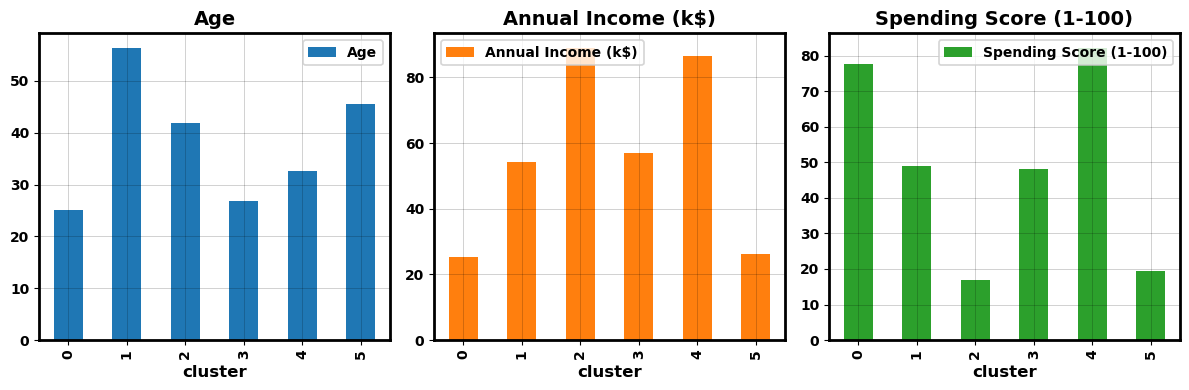

In [27]:
## Visualize the means values of each column
cluster_means_df.plot(subplots=True,
                   kind='bar',
                   figsize=(12,4),
                   layout =(1,3))
plt.tight_layout();

##### **Interpret and explain the Visualizations**

###### **'Age'**



**This visualization plots the mean 'age' of each cluster.**

- Clusters 0, 1, and 3 all have mean ages above 40.

- Cluster 3 has a mean age in the mid 20's.

- Cluster 3 has a mean age in the low 30's.

###### **'Annual Income (k$)'**

**This visualization plots the mean 'Annual Income (k$)' of each cluster.**

- Clusters 1 and 4 have high annual incomes, greater than $80k.

- Cluster 2 and 3 have low annual incomes, less than $30k.

- Cluster 0 has a moderate annual income, aproximately $50k.

###### **'Spending Score (1-100)'**

**This visualization plots the mean 'Spending Score (1-100)' of each cluster.**

- Cluster 1 and 2 have low spending scores.

- Cluster 0 has a moderate spending score.

- Clusters 3 and 4 have high spending scores.

#### **Describe the Clusters**

- **0. The Moderates**:
   - Older moderate earner and moderate spenders
- **1. The Savers**:
   - Older and successful but frugal
- **2. The Humble Elders**:
   - Low income and low spending
- **3. The Irresponsible Youth**:
   - Low income, big spenders
- **4. The 'Work Hard, Play Hard' Crowd**:
   - Big earners, Big spenders



### **Recommendations**

- How might mall stores market to each group (cluster) differently?

#### **3D Plotting**

- As a challenge make a 3D scatterplot!  See [link here](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) for info on 3D scatterplot

In [28]:
import plotly.express as px
px.scatter_3d(df,
              x='Annual Income (k$)',
              y='Spending Score (1-100)',
              z='Age',
              color='cluster')

- **What Questions do you have?**

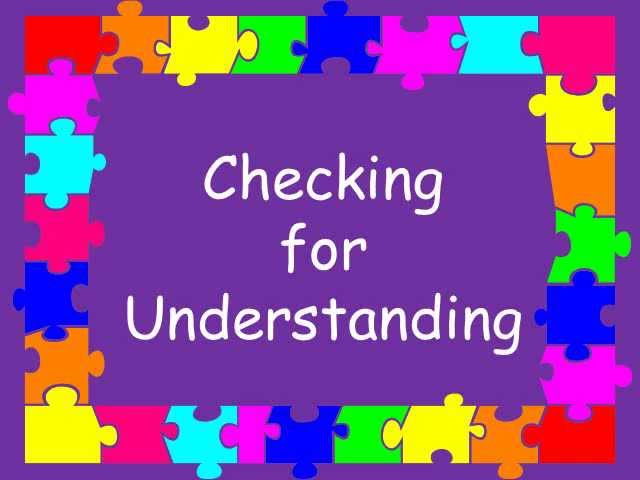